In [2]:
path = 'C:\\Users\\X1219\\Desktop\\电站.xlsx'
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import re

In [3]:
data = pd.read_excel(path)

In [27]:
data.head() 

,时间,1#顶盖螺栓轴力,1#顶盖螺栓温度,有功功率(MW),调速器.导叶A位置(%),调速器.导叶B位置(%),上库.水位(m),下库.水位(m),2号机组.有功功率,数据名称,...,4#顶盖螺栓轴力,4#顶盖螺栓温度,5#顶盖螺栓轴力,5#顶盖螺栓温度,6#顶盖螺栓轴力,6#顶盖螺栓温度,7#顶盖螺栓轴力,7#顶盖螺栓温度,8#顶盖螺栓轴力,8#顶盖螺栓温度
0,2024-04-01 17:00:40,1244.889,18.583,0.0,0.16,0.0,470.42,58.72,0.0,2024-04-01 17:00:08,...,1233.594,18.583,1237.090,18.583,1224.863,18.583,1226.784,18.583,1224.499,18.583
1,2024-04-01 17:00:45,1245.111,18.586,0.0,0.16,0.0,470.42,58.72,0.0,2024-04-01 17:00:33,...,1233.444,18.586,1237.051,18.586,1225.065,18.586,1226.908,18.586,1224.460,18.586
2,2024-04-01 17:00:50,1245.241,18.587,0.0,0.16,0.0,470.42,58.72,0.0,2024-04-01 17:00:58,...,1233.600,18.587,1237.174,18.587,1224.928,18.587,1227.604,18.587,1224.466,18.587
3,2024-04-01 17:00:55,1245.286,18.587,0.0,0.16,0.0,470.42,58.72,0.0,2024-04-01 17:01:23,...,1233.444,18.587,1237.109,18.587,1225.065,18.587,1226.895,18.587,1224.499,18.587
4,2024-04-01 17:01:00,1245.111,18.590,0.0,0.16,0.0,470.42,58.72,0.0,2024-04-01 17:01:48,...,1233.522,18.590,1236.348,18.590,1224.961,18.590,1226.712,18.590,1224.531,18.590


In [5]:
import pandas as pd

# 读取所有工作表，返回一个字典，键为工作表名称，值为 DataFrame
all_sheets = pd.read_excel(path, sheet_name=None)
sheet_dfs = {}
# 遍历所有工作表
for sheet_name, df in all_sheets.items():
    sheet_dfs[sheet_name] = df
    print(f"Sheet Name: {sheet_name}")
    # print(df.head())
    
    


Sheet Name: 4.1 17-22
Sheet Name: 4.2 15-20
Sheet Name: 4.3 15-21
Sheet Name: 4.4 8-14
Sheet Name: 405 0-5
Sheet Name: 405 18-23
Sheet Name: 406 0-5
Sheet Name: 407 0-5
Sheet Name: 407 17-23
Sheet Name: 408 2-5
Sheet Name: 408 12-15
Sheet Name: 408 18-22
Sheet Name: 409 0-7
Sheet Name: 409 18-22
Sheet Name: 410 0-5


In [9]:
# sheet_dfs['4.2 15-20']

时间
有功功率(MW)
调速器.导叶A位置(%)
调速器.导叶B位置(%)
上库.水位(m)
下库.水位(m)
数据名称
列 数据名称 不包含数值型数据，跳过绘图
1#顶盖螺栓轴力
1#顶盖螺栓温度
2#顶盖螺栓轴力
2#顶盖螺栓温度
3#顶盖螺栓轴力
3#顶盖螺栓温度
4#顶盖螺栓轴力
4#顶盖螺栓温度
5#顶盖螺栓轴力
5#顶盖螺栓温度
6#顶盖螺栓轴力
6#顶盖螺栓温度
7#顶盖螺栓轴力
7#顶盖螺栓温度
8#顶盖螺栓轴力
8#顶盖螺栓温度
2号机组.有功功率


C:\Users\X1219\AppData\Local\Temp\ipykernel_18676\2153947529.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(5, 2.5), layout='constrained')


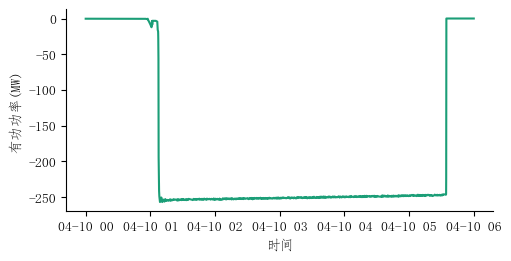

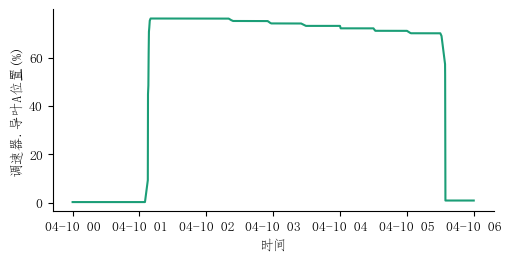

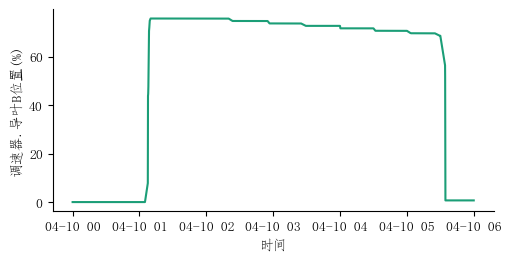

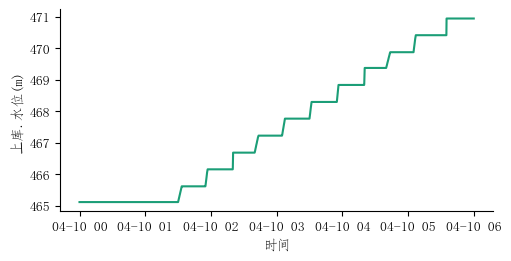

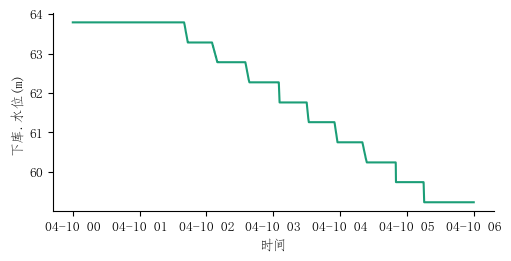

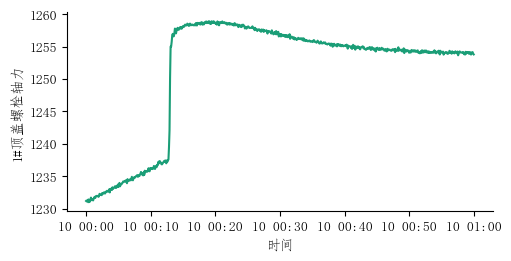

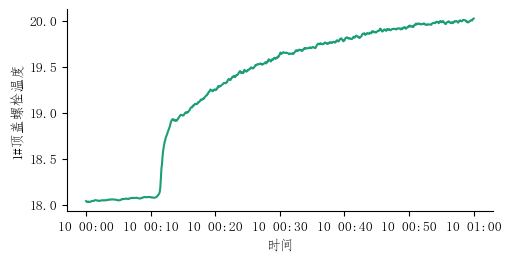

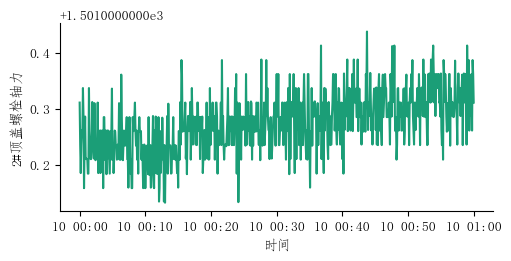

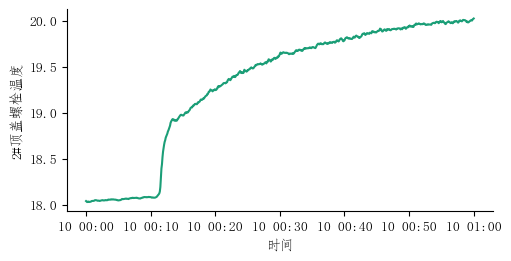

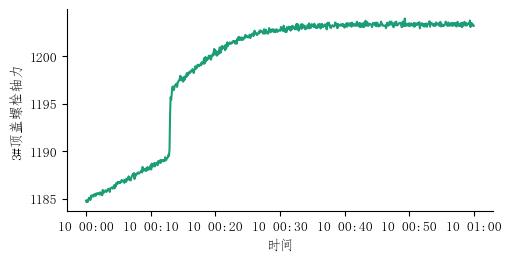

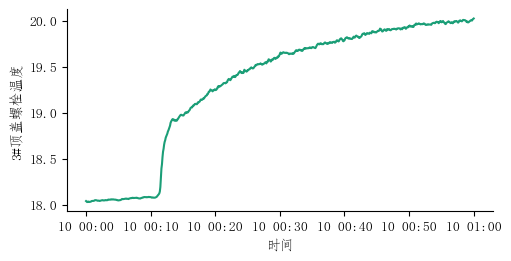

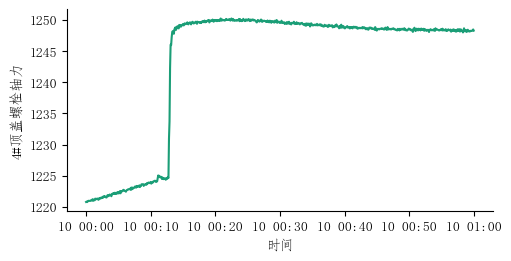

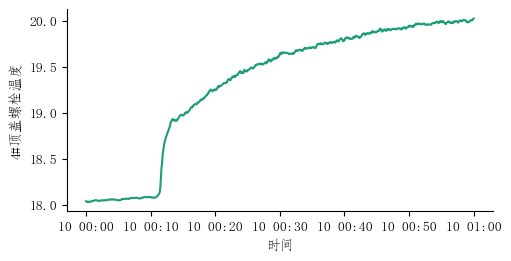

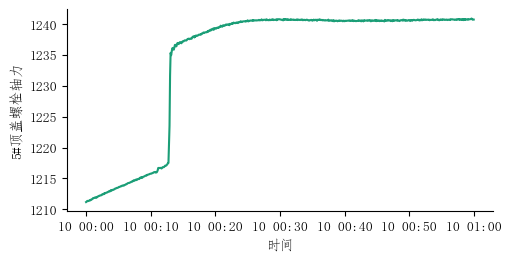

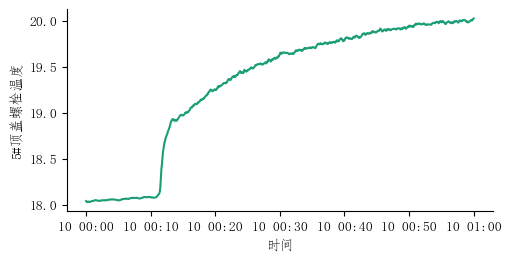

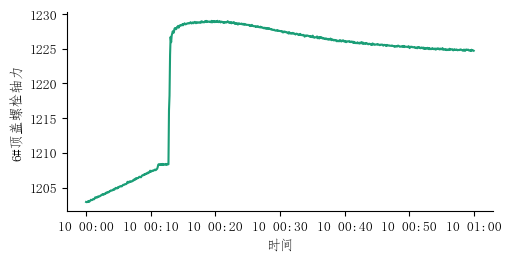

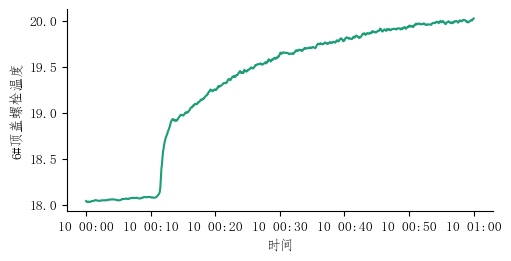

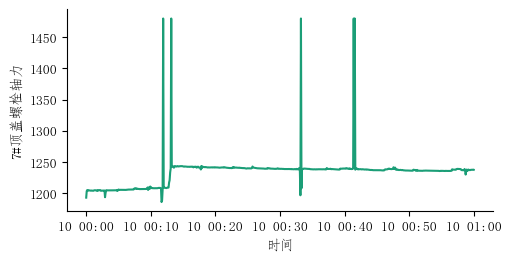

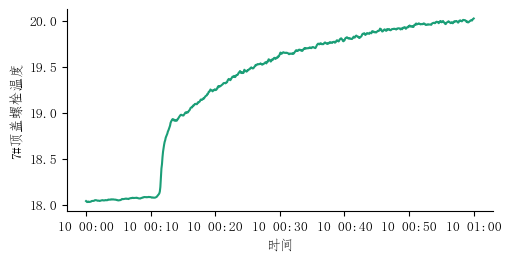

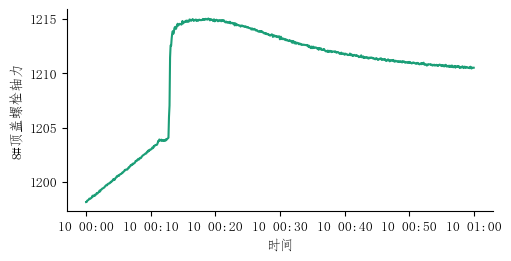

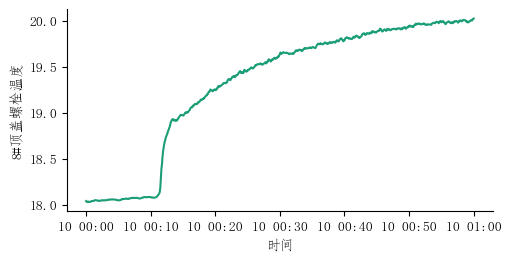

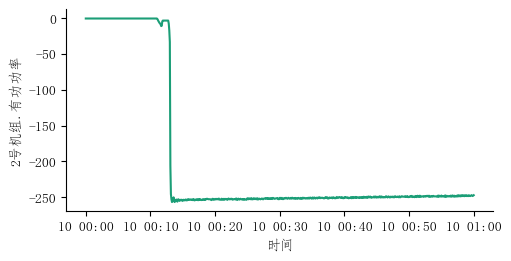

In [22]:

data = sheet_dfs['410 0-5'] 
# 负功率
# 4.4 8-14
# 406 0-5
# 407 0-5
# 408 2-5
# 408 12-15
# 409 0-7
# 410 0-5



# 设置全局字体
plt.rcParams["font.family"] = "FangSong"  # 仿宋
plt.rcParams["axes.unicode_minus"] = False  # 正常显示负号

def _plot_series(series, series_name, series_index=0, xs='时间', ys='1#顶盖螺栓轴力'):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series[xs]
    ys = series[ys]
    
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

for x in data.columns:
    print(x)
    if pd.api.types.is_datetime64_any_dtype(data[x]):
        continue  # 跳过 datetime64 类型的列
    
    # fig, ax = plt.subplots(figsize=(5, 2.5), layout='constrained')
    # df_sorted = data.sort_values('时间', ascending=True)
    # _plot_series(df_sorted,'',series_index=0,xs='时间', ys=str(x))
    # sns.despine(fig=fig, ax=ax)
    # # cleaned_text = re.sub(r'%', '', x)
    # plt.xlabel('时间')
    # _ = plt.ylabel(x)
    
    if pd.api.types.is_numeric_dtype(data[x]):
        # data[x].plot(kind='hist', bins=20, title=x)
        # plt.gca().spines[['top', 'right']].set_visible(False)
        # plt.savefig(f'{str(x)}.jpg')
        # plt.show()  # 显示图形
        fig, ax = plt.subplots(figsize=(5, 2.5), layout='constrained')
        df_sorted = data.sort_values('时间', ascending=True)
        _plot_series(df_sorted,'',series_index=0,xs='时间', ys=str(x))
        sns.despine(fig=fig, ax=ax)
        # cleaned_text = re.sub(r'%', '', x)
        plt.xlabel('时间')
        _ = plt.ylabel(x)
    else:
        print(f"列 {x} 不包含数值型数据，跳过绘图")
    
    # plt.savefig(f'时间 vs {str(x)}.jpg')

# 时间
# 1#顶盖螺栓轴力
# 1#顶盖螺栓温度
# 有功功率(MW)
# 调速器.导叶A位置(%)
# 调速器.导叶B位置(%)
# 上库.水位(m)
# 下库.水位(m)
# 2号机组.有功功率
# 数据名称